### Load Modules

In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from conv_net import ConvNet

In [3]:
tranform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])
train = datasets.CIFAR10(root='./data', train=True, transform=tranform, download=True)
test = datasets.CIFAR10(root='./data', train=False, transform=tranform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainloader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Visualize some training images

In [5]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


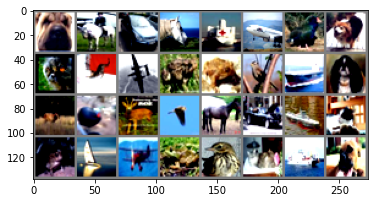

labels:
dog horse car horse ship plane bird dog cat cat plane frog frog bird ship dog deer bird deer bird horse car ship cat frog ship plane frog bird cat ship dog


In [6]:
dataiter = iter(trainloader)
img, labels = dataiter.next()

imshow(torchvision.utils.make_grid(img))
print(f'labels:\n{" ".join(classes[i] for i in labels)}')

### Creating Network

In [7]:
# VGG 11 architecture
net = ConvNet('11-layer', channels=img.size(1), classes=len(classes)) 
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

In [8]:
def train(trainloader, net, optimizer, loss_fn, epochs):

    # move net to device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    net.to(device)
    net.train()
    m, n = len(trainloader), len(trainloader.dataset)

    print('Training started')
    for epoch in range(epochs):
        samples_trained = 0

        for i, data in enumerate(trainloader, 0):
            # get and move inputs to device
            inputs, labels = data
            samples_trained += inputs.size(0)
            inputs, labels = inputs.to(device), labels.to(device)

            # zero gradient, find loss, update parameters
            optimizer.zero_grad()
            out = net(inputs)
            loss = loss_fn(out, labels)
            loss.backward()
            optimizer.step()

    # display verbose (every 25% of epoch)
            if (i + 1) % (int(m * 0.25)) == 0:
                print(f'Epoch: {epoch + 1}/{epochs}\n{samples_trained}/{n} Samples Trained\nLoss: {loss.item()}')
        print(f'Epoch {epoch + 1} Complete {samples_trained}/{n} Samples Trained\nLoss: {loss.item()}')
    print('Training Complete')

In [16]:
def test(testloader, net, loss_fn):

    # move net to device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    net.to(device)
    net.eval()
    correct = 0
    loss = 0
    n = len(testloader.dataset)
    
    # ignore gradients
    with torch.no_grad():
        for data in testloader:
            # move inputs and labels to device
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # get outputs, calculate loss, find correct predictions
            out = net(inputs)
            loss += loss_fn(out, labels).item()
            pred = out.argmax(dim=1)
            correct += pred.eq(labels).sum().item()
    
    # average loss and find accuracy
    loss /= n
    acc = correct / n

    print(f'Test Loss: {loss:.4f} | Test Acc: {acc * 100:.2f}%')

### Training & Testing Netowrk

In [10]:
train(trainloader, net, optimizer, loss_fn, epochs=2)

Training started
Epoch: 1/2
12480/50000 Samples Trained
Loss: 1.6165494918823242
Epoch: 1/2
24960/50000 Samples Trained
Loss: 0.85237717628479
Epoch: 1/2
37440/50000 Samples Trained
Loss: 1.0425878763198853
Epoch: 1/2
49920/50000 Samples Trained
Loss: 0.9593620896339417
Epoch 1 Complete 50000/50000 Samples Trained
Loss: 0.7275126576423645
Epoch: 2/2
12480/50000 Samples Trained
Loss: 0.9958834052085876
Epoch: 2/2
24960/50000 Samples Trained
Loss: 0.9031269550323486
Epoch: 2/2
37440/50000 Samples Trained
Loss: 0.8924037218093872
Epoch: 2/2
49920/50000 Samples Trained
Loss: 0.7620553374290466
Epoch 2 Complete 50000/50000 Samples Trained
Loss: 0.7370682954788208
Training Complete


In [17]:
test(testloader, net, loss_fn)

Test Loss: 0.0237 | Test Acc: 74.06%
